In [43]:
import time
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import BernoulliRBM

In [5]:
batch_size = 10

## Load MNIST data

In [20]:
# download and read the MNIST data
# Each value represent a pixel intensity ranges from 0 - 1 
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [92]:
x,_ = mnist.train.next_batch(5000) # values range from [0, 1]
x.shape

(5000, 784)

In [193]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.02, batch_size=50, n_iter=3000, random_state=0, verbose=1)

In [194]:
rbm.fit(x)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -272.46, time = 0.44s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -209.62, time = 0.56s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -186.23, time = 0.56s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -175.91, time = 0.55s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -166.91, time = 0.56s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -159.13, time = 0.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -152.68, time = 0.59s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -148.95, time = 0.57s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -145.05, time = 0.56s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -142.49, time = 0.58s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -139.81, time = 0.70s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -137.12, time = 0.57s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -134.80, time = 0.58s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -132.65, time = 0.57s
[BernoulliRBM] 

BernoulliRBM(batch_size=50, learning_rate=0.02, n_components=100, n_iter=3000,
       random_state=0, verbose=1)

In [90]:
rbm.components_.shape 

(10, 784)

### Plot original image

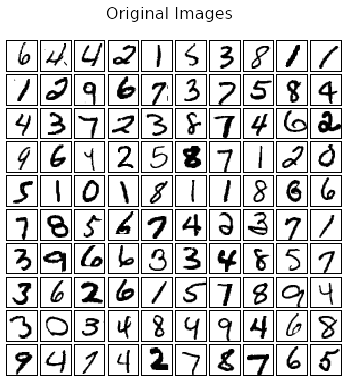

In [196]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(x[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Original Images', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()

### Plot latent component extracted by RBM
<p>Weights from input features to a hidden neuron correspond to one filter, since it is a mapping from the input (e.g. from an actual image) to the hidden neuron.</p>
<p>Each component is a non-linear transformation of all original features. The intensity of a pixel in the filter img indicates how much the orginal feature/pixel contributed to this component/filter img. White means positve weight, black means negative weight, grey means zero weight.</p>

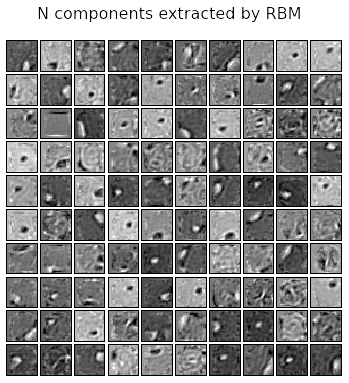

In [197]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('N components extracted by RBM', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()

In [198]:
# compute the hidden layer activation probabilities, P(h=1|v=X).
# that is, transform the original data so that each row is represented by the latent features
# for an instance, each of its latent feature has value between [0,1], 
# indicating how much the latent feature is activated when this instance is presented
x_latent=rbm.transform(x)
x_latent.shape

(5000, 100)

In [185]:
x_latent[4]

array([  1.43735567e-06,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   9.99997255e-01,   1.00000000e+00,
         1.00000000e+00,   2.76960041e-05,   1.00000000e+00,
         1.00000000e+00])

In [199]:
# compute the pseudo-likelihood of input instances
rbm.score_samples(x[:10])

array([ -1.88763576e-03,  -2.17825799e-03,  -6.37339668e+01,
        -9.16543151e-01,  -5.91935638e-03,  -7.49735959e-04,
        -4.28341642e-01,  -1.48421140e-03,  -1.42565453e-02,
        -8.08822692e-01])

### Data reconstruction

In [226]:
# perform Gibbs sampling (Markov Chain Monte Carlo) for K times
# the larger the K, the more normal-looking for the generated samples
def gibbs_sampling(k,x,rbm):
    counter = 0
    while counter < k:
        gibbs_x = rbm.gibbs(x) # return T/F which original pixels are activated
        x = np.zeros_like(x)
        x[gibbs_x] = 1 # make the "turned on" pixels to be 1, others to be 0
        counter+=1
    return x

In [249]:
gen_x = gibbs_sampling(1,x[:100],rbm)

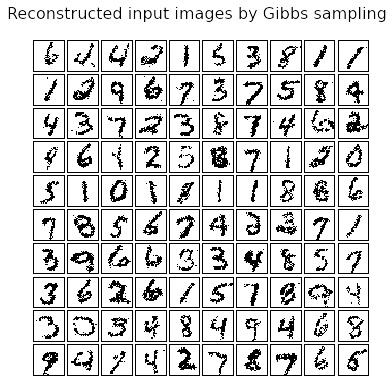

In [250]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(gen_x):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Reconstructed input images by Gibbs sampling', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()

### Generating new data

In [287]:
# 100 random samples, each sample has 784 features between [0,1]
z = np.random.random_sample((100,784))

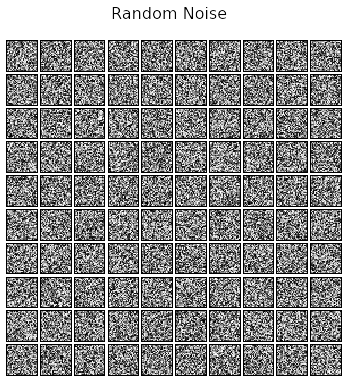

In [288]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(z):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Random Noise', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()

In [289]:
gen_z = gibbs_sampling(10000,z,rbm)

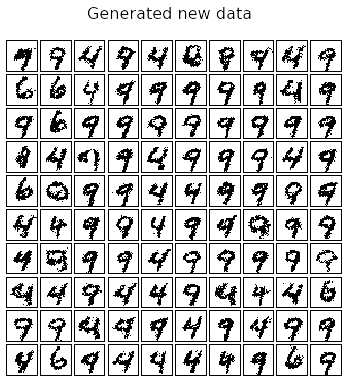

In [290]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(gen_z):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Generated new data', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()